# Spectral clustering
for determining the successfulness of object feature representation in identifying various objects

In [35]:
import numpy as np
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
import matplotlib.pyplot as plt

### Loading object features

In [36]:
### Object features
block_features = np.array([
    [0.025, 0.05, 0.05, 0., 0.],
    [0.03, 0.025, 0.045, 0., 0.],
    [0.05, 0.025, 0.04, 0., 0.],
])

cylinder_features = np.array([
    [0.04, 0.04, 0.05, 950.21606561, 14540.28434464],
    [0.045, 0.045, 0.035, 750.78800246, 11488.6197291],
    [0.034, 0.034, 0.045, 1315.17794549, 20124.96103064]
])

# bottle_features = np.array([
#     [1.0, 0.6, 0.6, 309.36678819, 2821.1936563 , 354.75590933, 913.89530908,1272.62981163, 2693.03405172],
#     [0.85, 0.8, 0.85, 409.36678819, 2521.1936563 , 274.75590933, 1003.89530908, 1352.62981163, 3013.03405172],
#     [0.9, 0.8, 1.0, 362.36678819, 2725.1936563 , 406.75590933, 783.89530908, 982.62981163, 2533.03405172],
# ])

# object_names = {0: 'cylinder', 1: 'bottle', 2: 'block'}
object_names = {0: 'cylinder', 1: 'block'}

### Feature transformation

Concatenating features together

In [37]:
# objects = (block_features, cylinder_features, bottle_features)
objects = (block_features, cylinder_features)
features = np.concatenate(objects)
features

array([[2.50000000e-02, 5.00000000e-02, 5.00000000e-02, 0.00000000e+00,
        0.00000000e+00],
       [3.00000000e-02, 2.50000000e-02, 4.50000000e-02, 0.00000000e+00,
        0.00000000e+00],
       [5.00000000e-02, 2.50000000e-02, 4.00000000e-02, 0.00000000e+00,
        0.00000000e+00],
       [4.00000000e-02, 4.00000000e-02, 5.00000000e-02, 9.50216066e+02,
        1.45402843e+04],
       [4.50000000e-02, 4.50000000e-02, 3.50000000e-02, 7.50788002e+02,
        1.14886197e+04],
       [3.40000000e-02, 3.40000000e-02, 4.50000000e-02, 1.31517795e+03,
        2.01249610e+04]])

Standardize the data

In [38]:
scaler = StandardScaler()
features = scaler.fit_transform(features)
features

array([[-1.43479846,  1.42633047,  1.09321633, -0.94999091, -0.94999091],
       [-0.85312341, -1.21502225,  0.15617376, -0.94999091, -0.94999091],
       [ 1.4735768 , -1.21502225, -0.78086881, -0.94999091, -0.94999091],
       [ 0.31022669,  0.36978938,  1.09321633,  0.84571629,  0.84571629],
       [ 0.89190174,  0.89805992, -1.71791138,  0.46883947,  0.46883947],
       [-0.38778337, -0.26413527,  0.15617376,  1.53541698,  1.53541698]])

### Spectral clustering

In [39]:
clusters = 2
# kmeans = KMeans(n_clusters=clusters, n_init=3, random_state=0)
# kmeans.fit(features)
# labels = kmeans.labels_
# labels

spectral = SpectralClustering(n_clusters=clusters, affinity='nearest_neighbors', n_neighbors=3, random_state=0)
spectral.fit(features)
labels = spectral.labels_
labels

array([1, 1, 1, 0, 0, 0])

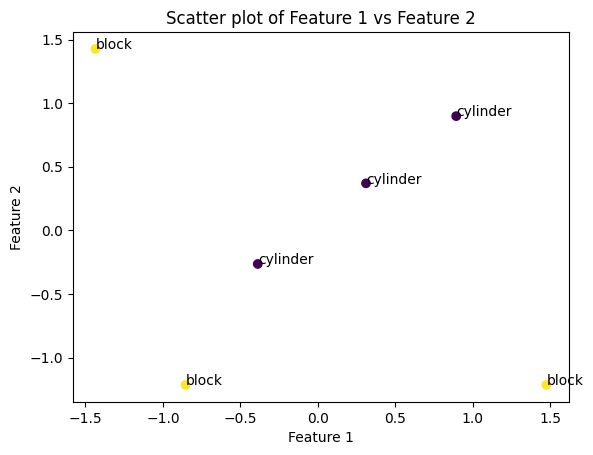

In [40]:
# Create a scatter plot of feature 1 against feature 2
fig, ax = plt.subplots()
scatter = ax.scatter(features[:, 0], features[:, 1], c=labels, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter plot of Feature 1 vs Feature 2')

# Add labels for each point
for i, label in enumerate(labels):
    ax.annotate(str(object_names[label]), (features[i, 0], features[i, 1]))

plt.show()